In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_import import df_merged
plt.style.use("dark_background")
def leastsquares(A, b):
    import numpy.linalg as npl
    return npl.lstsq(A, b, rcond=None)[0]

1999-03-10 00:00:00
           Date      Volume  % Change % change binned  TMAX  TMIN  TOTALPRCP  \
0    1999-03-10  11700414.0 -0.124666        negative    42    27       0.00   
1    1999-03-11  21670048.0 -0.247858        negative    40    26       0.00   
2    1999-03-12  19553768.0 -2.080007        negative    39    24       0.00   
3    1999-03-15  14245348.0  2.108601        positive    41    32       4.37   
4    1999-03-16  10971066.0  0.419432        positive    50    32       0.00   
...         ...         ...       ...             ...   ...   ...        ...   
4696 2017-11-06   9714451.5  0.195827        positive    66    46       0.01   
4697 2017-11-07  10337675.5 -0.068213        negative    49    40       0.70   
4698 2017-11-08   9011700.7  0.188292        positive    49    39       0.00   
4699 2017-11-09  16871876.3  0.149131        positive    55    39       0.00   
4700 2017-11-10   9777757.4  0.053403        positive    51    25       0.01   

     binned  
0    

In [2]:
negative = df_merged.loc[df_merged['% change binned'] == 'negative'].loc[:, ["TMAX", "TMIN", "TOTALPRCP"]].values.tolist()
positive = df_merged.loc[df_merged['% change binned'] == 'positive'].loc[:, ["TMAX", "TMIN", "TOTALPRCP"]].values.tolist()

spy_data = {
    'positive' : positive, 'negative' : negative }

positive_total = len(positive)
negative_total = len(negative)
total_len = positive_total + negative_total


In [3]:
A = np.zeros((total_len, 3))
A[0:positive_total, :] = spy_data['positive']
A[positive_total:total_len, :] = spy_data['negative']
A = np.hstack([np.ones((total_len, 1)), A])

In [4]:
y = np.zeros((total_len,1))
y[0:positive_total] = 1 
y[positive_total:] = -1

In [5]:
x = leastsquares(A,y)
yhat = A @ x
yhat

array([[0.14423992],
       [0.1438521 ],
       [0.10438108],
       ...,
       [0.07744082],
       [0.08340969],
       [0.09275001]])

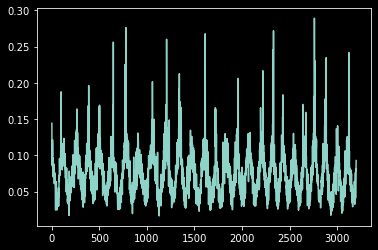

In [6]:
plt.plot(range(total_len), yhat)

In [7]:
y_n = np.zeros((total_len, 1))
y_n[0:positive_total] = -1
y_n[positive_total: total_len] = 1
x_n = leastsquares(A, y_n)
yhat_xn = A @ x_n

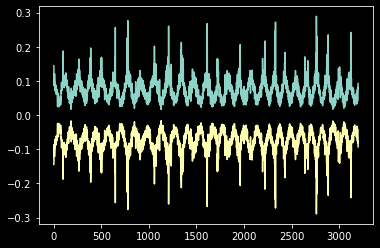

In [8]:
plt.plot(range(total_len),yhat, yhat_xn)

In [9]:
def fhat(row):
    y_positive = row @ x
    y_negative = row @ x_n
    outs = [y_positive, y_negative]
    if max(outs) == y_positive:
        return 'positive'
    else:
        return 'negative'

correct = ['positive'] * positive_total +  ['negative'] * negative_total

yhat_final = np.array([fhat(A[i, :]) for i in range(total_len)])
error_rate_final = sum(yhat_final != np.array(correct))/total_len


In [10]:
print(error_rate_final)

0.4626679162761637


In [11]:
def sign(yhat):
    return 2.0 * (yhat > 0) - 1.0

"""Function definitions for Performance metrics, from Table 14.1 and pg.287 in Introduction to Applied Linear Algebra"""

def error_rate(y,yhat,total_len):
    sum_fpfn = 0
    for i in range(total_len):
        if y[i] !=sign(yhat[i]):
            sum_fpfn += 1
    return sum_fpfn/total_len

def true_positive(y,yhat,total_len):
    sum_tp = 0
    sum_p = 0
    for i in range(total_len):
        if y[i] == 1:
            sum_p += 1
            if sign(yhat[i]) == 1:
                sum_tp += 1
    return sum_tp/sum_p
        
def false_positive(y,yhat,total_len):
    sum_fp = 0
    sum_n = 0
    for i in range(total_len):
        if y[i] != 1:
            sum_n += 1
            if sign(yhat[i]) == 1:
                sum_fp += 1
    return sum_fp/sum_n

def true_negative(y,yhat,total_len):
    sum_tn = 0
    sum_n = 0
    for i in range(total_len):
        if y[i] != 1:
            sum_n += 1
            if sign(yhat[i]) !=1:
                sum_tn += 1
    return sum_tn/sum_n
         
def precision(y,yhat,total_len):
    sum_tp = 0
    sum_fp = 0
    for i in range(total_len):
        if y[i] == 1 and sign(yhat[i]) == 1:
            sum_tp += 1
        if y[i] != 1 and sign(yhat[i]) == 1:
            sum_fp += 1
    return sum_tp/(sum_tp + sum_fp)

In [12]:
print(error_rate(y,yhat,total_len), error_rate(y_n,yhat_xn,total_len))
print(true_positive(y,yhat,total_len), true_positive(y_n,yhat_xn,total_len))
print(false_positive(y,yhat,total_len), false_positive(y_n,yhat_xn,total_len))
print(true_negative(y,yhat,total_len), true_negative(y_n,yhat_xn,total_len))
print(precision(y,yhat,total_len), precision(y_n,yhat_xn,total_len))

0.4626679162761637 0.4626679162761637
1.0 0.0
1.0 0.0
0.0 1.0


ZeroDivisionError: division by zero

In [13]:
sign(yhat)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [14]:
'negative' in correct

True

In [15]:
'positive' in correct

True

In [ ]:
from tabulate import tabulate
data = [['Error Rate', error_rate(y,yhat,total_len), error_rate(y_n,yhat_xn,total_len)], 
        ['True Positive', true_positive(y,yhat,total_len), true_positive(y_n,yhat_xn,total_len)], 
        ['False Positive', false_positive(y,yhat,total_len), false_positive(y_n,yhat_xn,total_len)], 
        ['True Negative', true_negative(y,yhat,total_len), true_negative(y_n,yhat_xn,total_len)],['Precision', precision(y,yhat,total_len), precision(y_n,yhat_xn,total_len)],['Final Error Rate', error_rate_final]]
print (tabulate(data, headers=["Calculated from Positives", "Calculated From Negatives", ]))

ZeroDivisionError: division by zero